In [1]:
###############################################################################################
# supprimez cette cellule si vous exécutez ce notebook en-dehors de la distribution CHIM2-ON1 #
###############################################################################################

import os
import sys

cwd0 = './config/'
sys.path.append(cwd0)

import visualID as vID
from visualID import color
vID.init(cwd0)

**Début à:** Wednesday 09 November 2022, 11:42:20  
**Hostname:** heimdall (Darwin)

<p style="text-align: center"><img width="800px" src="./config/svg/logoDebut.svg" style="margin-left:auto; margin-right:auto"/></p>

# Ajustement de modèles 

## Prérequis

- Les variables
- Les tableaux
- Les graphes

## Compétences 

1. Trouver les paramètres d'un modèle qui permettent de bien représenter des données.  

## Objectifs 

1. Acquérir les compétences ci-dessus.

## Contenu de la vidéo 

Nous allons voir comment modéliser des données à l'aide d'une fonction linéaire, polynomiale, ou arbitraire. Pour ceci, nous allons utiliser les données du fichier Concentrations.txt que vous avez utilisé pour découvrir la lecture/écriture dans les fichiers. 

### Ajustement d'une droite ou d'un polynôme

Une droite est un polynôme de degré 1, donc nous allons utiliser la méthode pour ajuster un polynôme directement. Les polynômes sont dans le module Python `numpy.polynomial`. Ce module contient des objets pour représenter des polynômes simples, ou bien des polynômes de Chebyshev, Legendre, etc. Nous allons rester ici sur les polynômes simples. 

Le premier exemple concerne une régression linéaire, c'est-à-dire utilisant un polynôme de degré 1.  

Les coefficients du polynome sont :  [1.29965019 3.17208498]


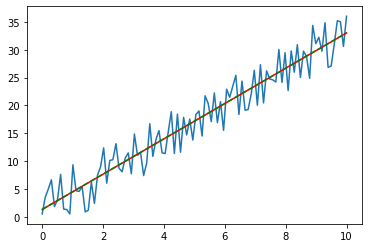

In [2]:
from pylab import *

# Lecture et trace des donnees 
t = linspace(0,10,100)
C = 1.06 + 3.25*t + (random(len(t))-0.5)*10
plot(t, C)

# Ajustement de A
from numpy.polynomial import polynomial as poly   
p = poly.polyfit( t, C, deg=1 )
print("Les coefficients du polynome sont : ", p)

# Construction de la droite a partir de la methode "polyval"...
y = poly.polyval( t, p )
plot(t, y, 'r')

# ... ou bien meme chose "a la main" : 
z = p[0] + t*p[1] 
plot(t, z, '--g')

Au lieu d'utiliser un polynôme d'ordre 1, il est aussi possible d'utiliser la fonction `linregress` du module `scipy.stats`. 

La pente est               :  3.2305138703323397
L'ordonnee a l'origine est :  0.680849782229636
Le coefficient r^2 est     :  0.9239391702218046


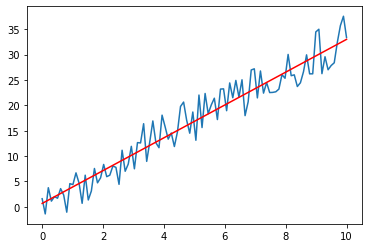

In [3]:
from pylab import *

# Lecture et trace des donnees 
t = linspace(0,10,100)
C = 1.06 + 3.25*t + (random(len(t))-0.5)*10
plot(t, C)

# Ajustement de A
from scipy.stats import linregress   
fit = linregress( t, C)
a  = fit.slope
b  = fit.intercept
r2 = fit.rvalue**2
print("La pente est               : ", a)
print("L'ordonnee a l'origine est : ", b)
print("Le coefficient r^2 est     : ", r2)

# Construction de la droite a partir des coefficients trouves...
y = a*t + b
plot(t, y, 'r')


En cinétique chimique, on utilise souvent des régressions linéaires. Prenons par exemple une cinétique chimique d'ordre 1. Les concentrations en réactifs suivent des lois exponentielles : 
$$A(t)=A(0)e^{-kt}$$
où $k$ est la constante de vitesse. Si on veut ajuster les données avec un tel modèle, on peut le récrire 
$$\ln A(t) = \ln A(0) -kt$$
et faire un ajustement de droite sur les variables $t$ et $\ln A$, ce qui nous donne la constante $k$. Voici un exemple en Python :

Les coefficients du polynome sont :  [ 0.93266637 -0.03000609]


Text(0, 0.5, 'Concentration (mM)')

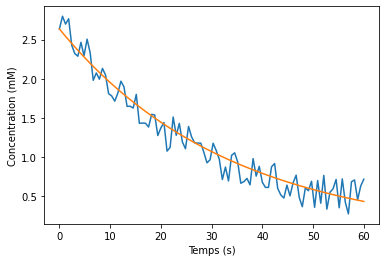

In [4]:
from pylab import * 

# Generation donnees avec du bruit 
t = linspace(0, 60, 100) 
A = 2.5*exp(-0.04*t) + 0.5*random(100)

# Ajustement de ln(A), note log(A) en python : 
from numpy.polynomial import polynomial as poly   
p = poly.polyfit( t, log(A), deg=1 )                 # ajustement linéaire avec t en abscisse et log(A) en ordonnee
print("Les coefficients du polynome sont : ", p)
k = -p[1]                                            # k est moins la pente 

y = A[0]*exp(-k*t)                                   # y est un tableau de valeurs base sur le modele 

# Trace
plot(t, A, label='A')
plot(t, y, label='modele 1er ordre')
xlabel('Temps (s)')
ylabel('Concentration (mM)')


NB : il existe d'autres modules Python proposant des régressions linéaires. Vous verrez un peu plus tard l'utilisation de sklearn.linear_model.LinearRegression dans le cadre de l'analyse de données.  


Le troisième exemple ci-dessous montre comment faire pour un polynôme d'ordre 2 : 

Les coefficients du polynome sont :  [ 1.13178711  3.26959447 -1.24030928]


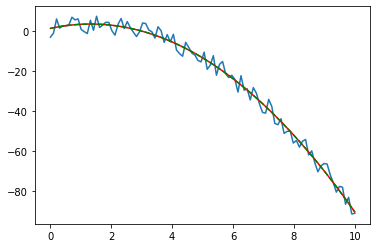

In [5]:
from pylab import *

# Lecture et trace des donnees 
t = linspace(0,10,100)
C = 1.06 + 3.25*t - 1.23*t**2 + (random(len(t))-0.5)*10
plot(t, C)

# Ajustement de A
from numpy.polynomial import polynomial as poly   
p = poly.polyfit( t, C, deg=2 )
print("Les coefficients du polynome sont : ", p)

y = poly.polyval( t, p )
z = p[0] + t*p[1] + t**2*p[2]

plot(t, y, 'r')
plot(t, z, '--g')

### Ajustement d'une fonction arbitraire

Parfois, nous voulons trouver les paramètres d'un modèle qui n'est ni une droite ni un polynôme. Reprenons l'exemple des données dans le fichier Concentrations.txt. Il s'agit d'une cinétique réaction chimique correspondant à 
$$ A+B\rightarrow C$$
On se demande si cette réaction peut être modélisée avec la cinétique : 
$$\frac{dC}{dt}=kAB$$
On peut définir $x(t)$ tel que $C(t)=x(t)$, $A(t)=A_0-x(t)$ et $B(t)=B_0-x(t)$. La solution de l'équation précédente est 
$$x(t)=A_0\frac{1-e^{(A_0-B_0)kt}}{1-\frac{A_0}{B_0}e^{(A_0-B_0)kt}}$$
Dans l'exemple ci-dessous, on définit ce modèle dans une fonction `x(t,k)` et on utilise la fonction `curve_fit` de `scipy.optimize` pour trouver la meilleure valeur de $k$ possible pour reproduire les données du fichier Concentrations.txt. 

L'ordre de la reaction deduit des donnees est :  0.994180162035747


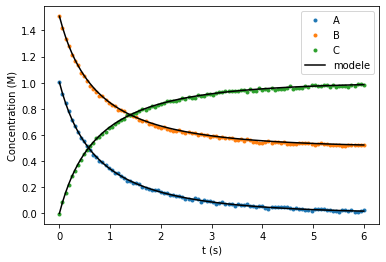

In [6]:
from pylab import *
t, A, B, C = genfromtxt('Concentrations.txt', unpack=True)
plot(t, A, '.', label='A')
plot(t, B, '.', label='B')
plot(t, C, '.', label='C')
A0 = A[0]
B0 = B[0]

# On definit la fonction modele avec en premier argument la variable qui correspond aux abscisses sur un graphe. 
# Ici il s'agit du temps t. L'argument ou les arguments suivant(s) sont les parametres ajustables, ici la constante k.   
def x(t,k):
    tt = (A0-B0)*k*t
    return A0*(1-exp(tt))/(1-A0/B0*exp(tt))

from scipy.optimize import curve_fit
# la syntaxe est curve_fit( fonction servant de modele, tableau de donnees abscisses, tableau de donnees ordonnees, estimation de la valeur du/des parametre(s) a determiner )
x_experimental = A0-A 
resultat = curve_fit(x, t, x_experimental, 0.8)

# La variable resutat est une liste qui s'ecrit ( tableau_des_parametres_optimaux, tableau_des_erreurs ), 
# et ce meme s'il n'y a qu'un parametre a ajuster comme ici. On a donc resultat = ( [k], [erreur_sur_k] )
k_optimal = resultat[0][0]
erreur = resultat[1][0]

print("L'ordre de la reaction deduit des donnees est : ", k_optimal)

# On genere des courbes basees sur le modele optimise
modele_A = A0-x(t,k_optimal) 
modele_B = B0-x(t,k_optimal) 
modele_C = x(t,k_optimal) 

# Graphe
plot(t, modele_A, '-k')
plot(t, modele_B, '-k')
plot(t, modele_C, '-k', label='modele')
xlabel('t (s)')
ylabel('Concentration (M)')
legend()

In [7]:
###############################################################################################
# supprimez cette cellule si vous exécutez ce notebook en-dehors de la distribution CHIM2-ON1 #
###############################################################################################

vID.end(cwd0)

**Fin à:** Wednesday 09 November 2022, 11:42:25  
**Durée:** 00:00:04 386ms

<p style="text-align: center"><img width="800px" src="./config/svg/logoFin.svg" style="margin-left:auto; margin-right:auto"/></p>